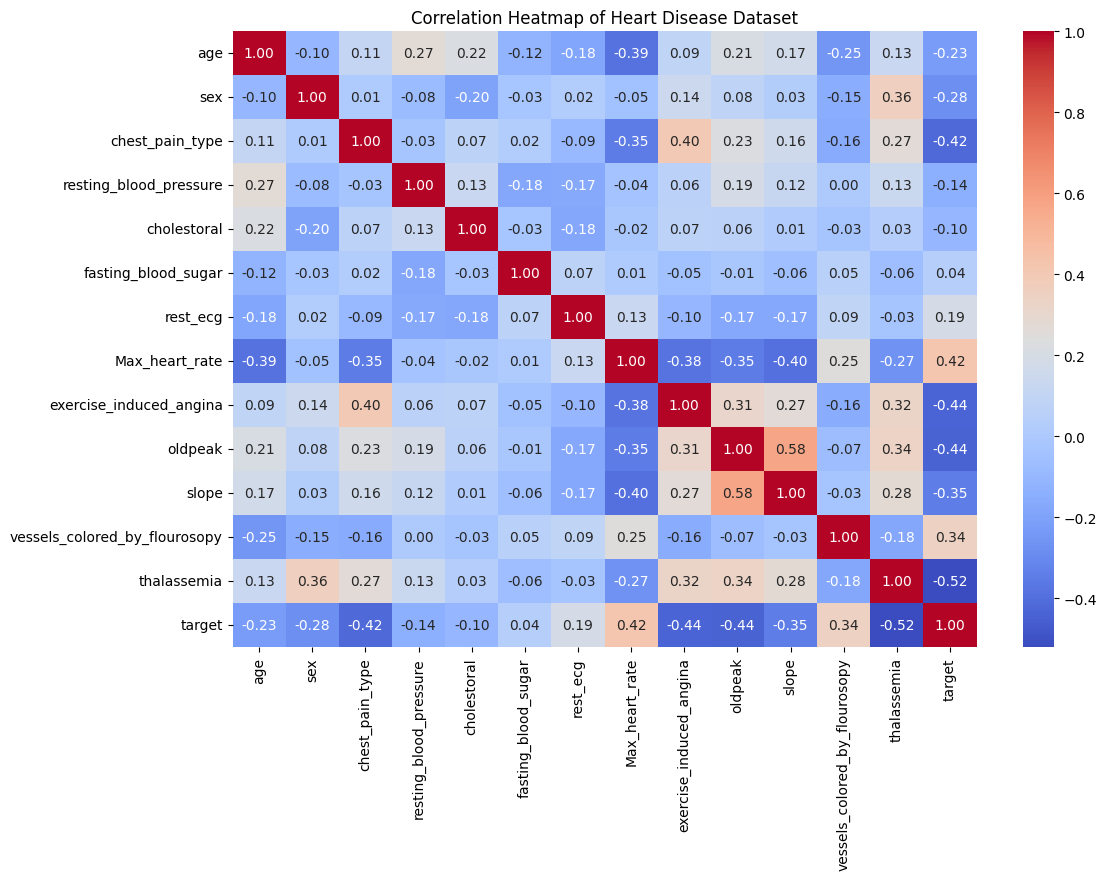

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace the file path with your actual path)
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/HeartDisease.csv'
data = pd.read_csv(file_path)

# Encode categorical columns into numerical values
encoded_data = data.copy()
categorical_columns = [
    'sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
    'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia'
]

for column in categorical_columns:
    encoded_data[column] = encoded_data[column].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()


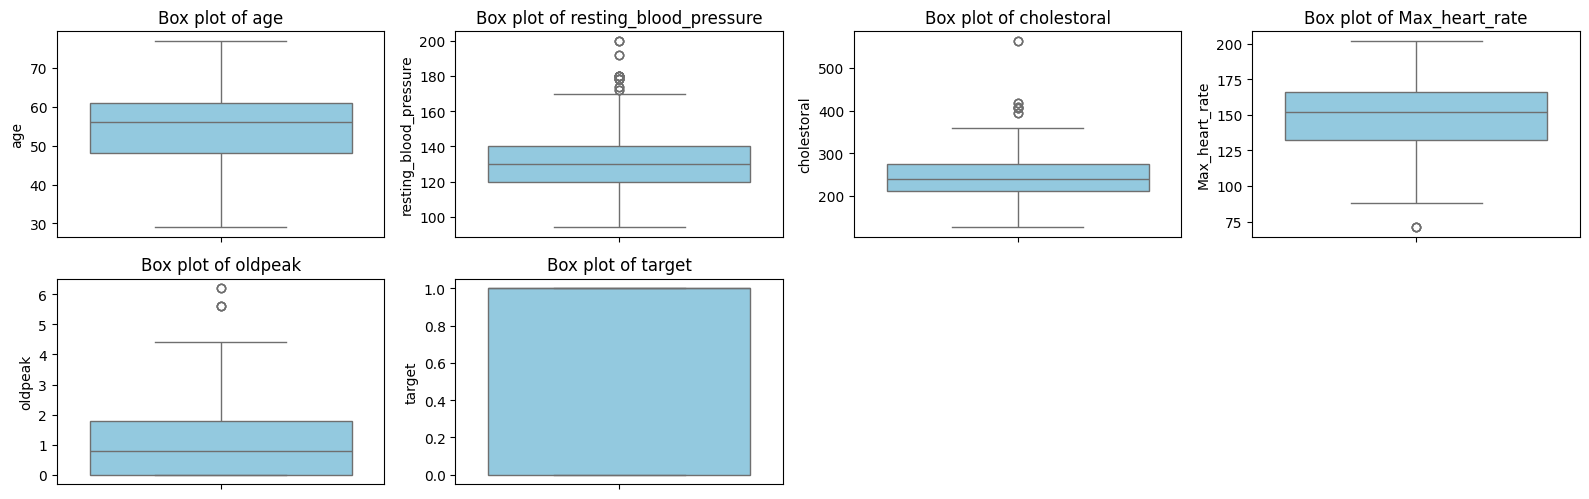

In [11]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1): #starts a loop that goes through each column with numbers
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()



In [12]:
# Preprocessing the dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy the data to avoid modifying the original dataset
cleaned_data = data.copy()

# Step 1: Encode categorical variables
categorical_columns = [
    'sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
    'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia'
]
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    cleaned_data[column] = label_encoders[column].fit_transform(cleaned_data[column])

# Step 2: Scale numerical features
numerical_columns = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
scaler = StandardScaler()
cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

# Step 3: Verify no missing values
if cleaned_data.isnull().sum().any():
    print("Missing values detected! Please handle them before training.")
else:
    print("No missing values detected.")

# Save the cleaned dataset for later use
cleaned_file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


No missing values detected.
Cleaned dataset saved to: C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv
